In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# 加载数据
import os
import wget 
def read_csv(path, remote=False, refresh=False):
    """读取csv,若是远程文件第一次远程读取，下载在本地，以后直接从本地读取"""
    if not remote:
        return pd.read_csv(path)
    
    out_path = path.split('/')[-1] + '.csv'
    if refresh:
        wget.download(path, out_path)
        return pd.read_csv(out_path)
    else:
        if os.path.exists(out_path):
            return pd.read_csv(out_path)
        else:
            wget.download(path, out_path)
            return pd.read_csv(out_path)                
                

## 散点图
area, poptotal两个维度的关系。并以颜色标识出category

In [14]:
df = read_csv('https://query.data.world/s/ohormtabw66yxfxj36lxovda3xbkv4', remote=True)
df.head(5).T

,0,1,2,3,4
PID,561,562,563,564,565
county,ADAMS,ALEXANDER,BOND,BOONE,BROWN
state,IL,IL,IL,IL,IL
area,0.052,0.014,0.022,0.017,0.018
poptotal,66090,10626,14991,30806,5836
popdensity,1270.96,759,681.409,1812.12,324.222
popwhite,63917,7054,14477,29344,5264
popblack,1702,3496,429,127,547
popamerindian,98,19,35,46,14
popasian,249,48,16,150,5


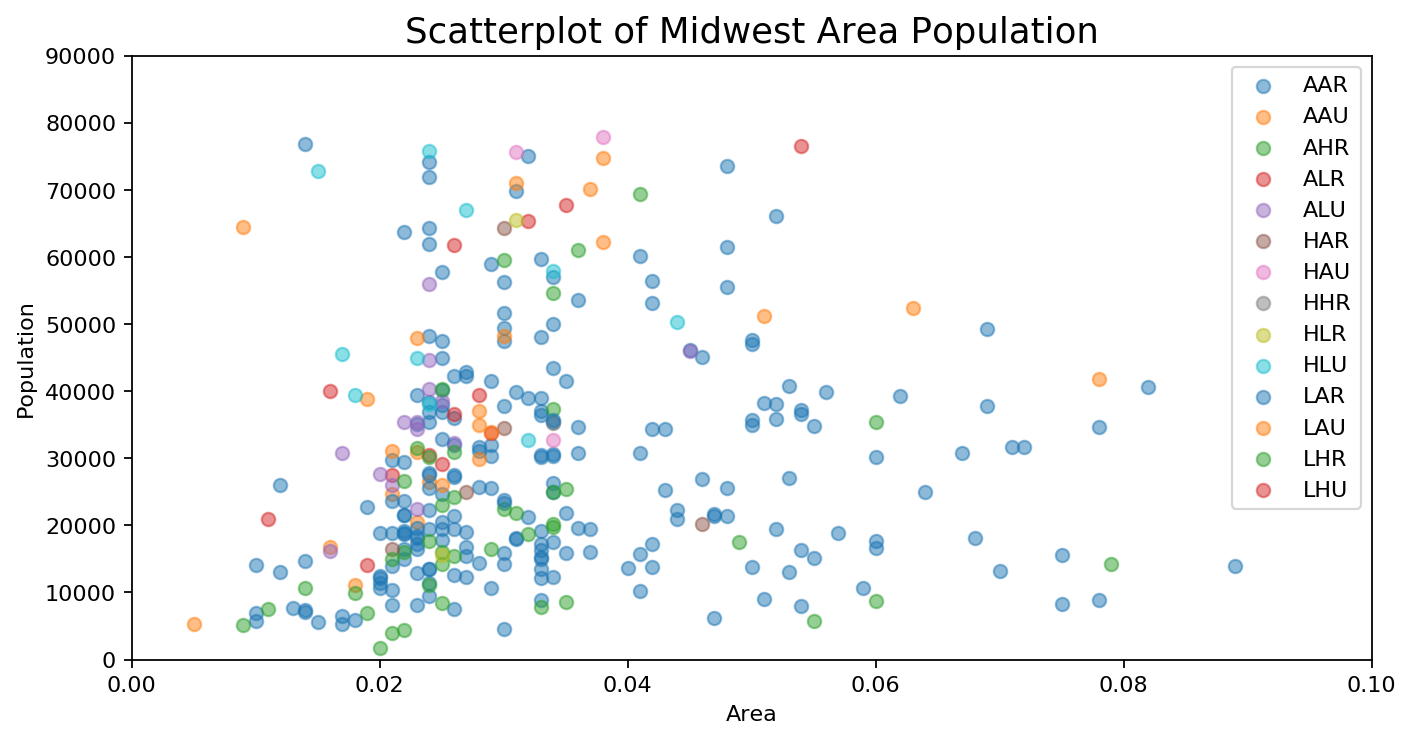

In [56]:
# 获取category的枚举值
category = np.unique(df['category'])
plt.figure(figsize=(10,5), dpi=160, facecolor='w', edgecolor='k')

# 绘制基础图: 不同categroy的area与poptotal两个维度散点图
for item in category:
    tmp_df = df[df['category']==item]
    # 设置：alpha透明度; 
    plt.scatter(x=tmp_df['area'], y=tmp_df['poptotal'], label=item, alpha=0.5)

# 绘制图例和标题
plt.legend(fontsize=10)
plt.title("Scatterplot of Midwest Area Population", fontsize=16)

# x,y轴尺度设置
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set(
    xlim=(0.0, 0.1), ylim=(0, 90000),
    xlabel='Area', ylabel='Population'
)

# 显示
plt.show()
